In [52]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [53]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
frac = df['Age'] % 1
df['Age'] = np.where(frac < 0.5, np.floor(df['Age']),
np.where(frac > 0.5, np.ceil(df['Age']),
np.floor(df['Age']))).astype(int)

In [54]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [56]:
display(df.describe())
display(df['Survived'].value_counts())
display(df['Pclass'].value_counts())
display(df['Sex'].value_counts())
display(df['Embarked'].value_counts())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.432099,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.012381,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,count
Survived,
0,549
1,342


,count
Pclass,
3,491
1,216
2,184


,count
Sex,
male,577
female,314


,count
Embarked,
S,644
C,168
Q,77


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

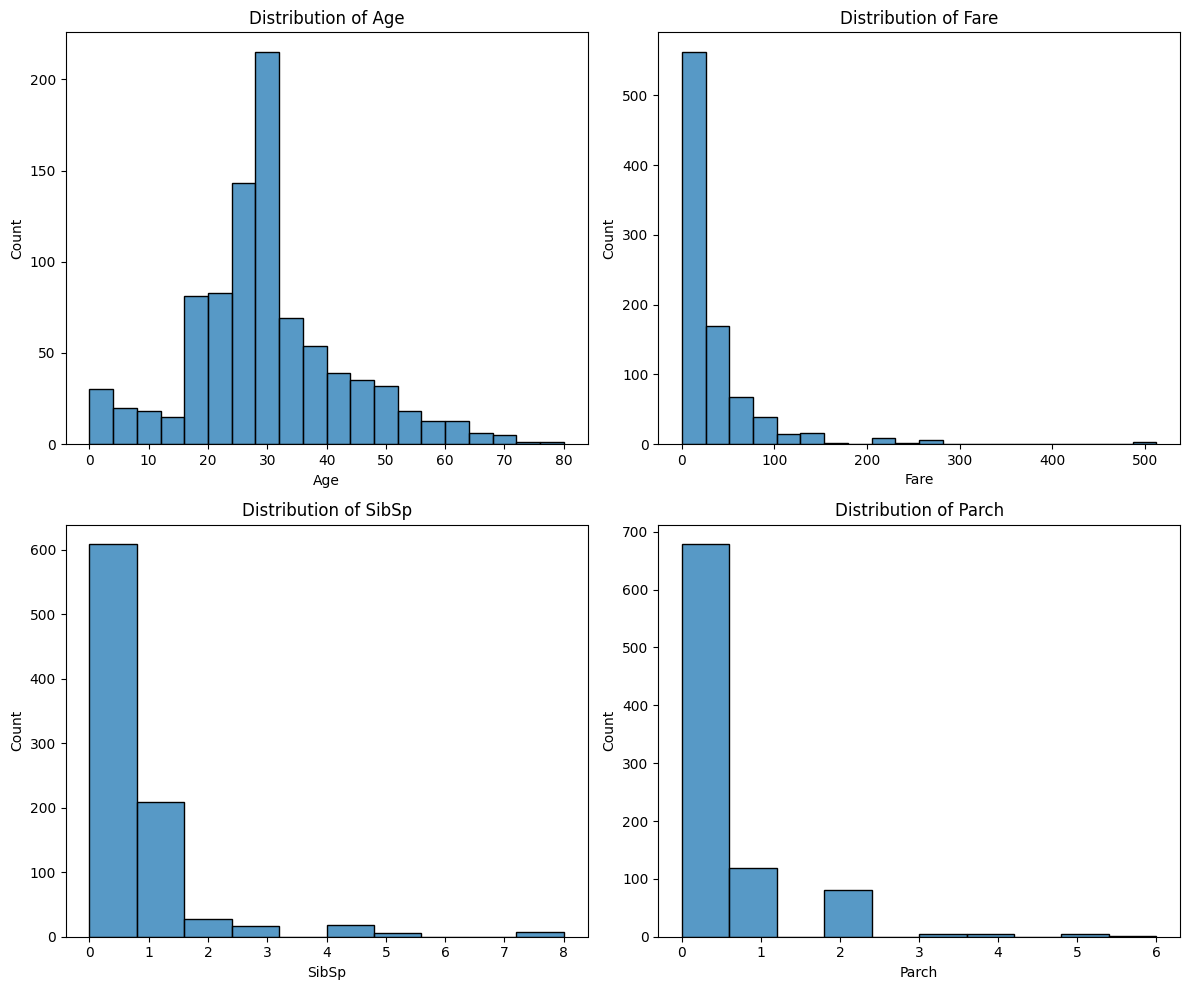

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['Age'], bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
sns.histplot(df['Fare'], bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Fare')
sns.histplot(df['SibSp'], bins=10, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of SibSp')
sns.histplot(df['Parch'], bins=10, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Parch')
plt.tight_layout()
plt.show()

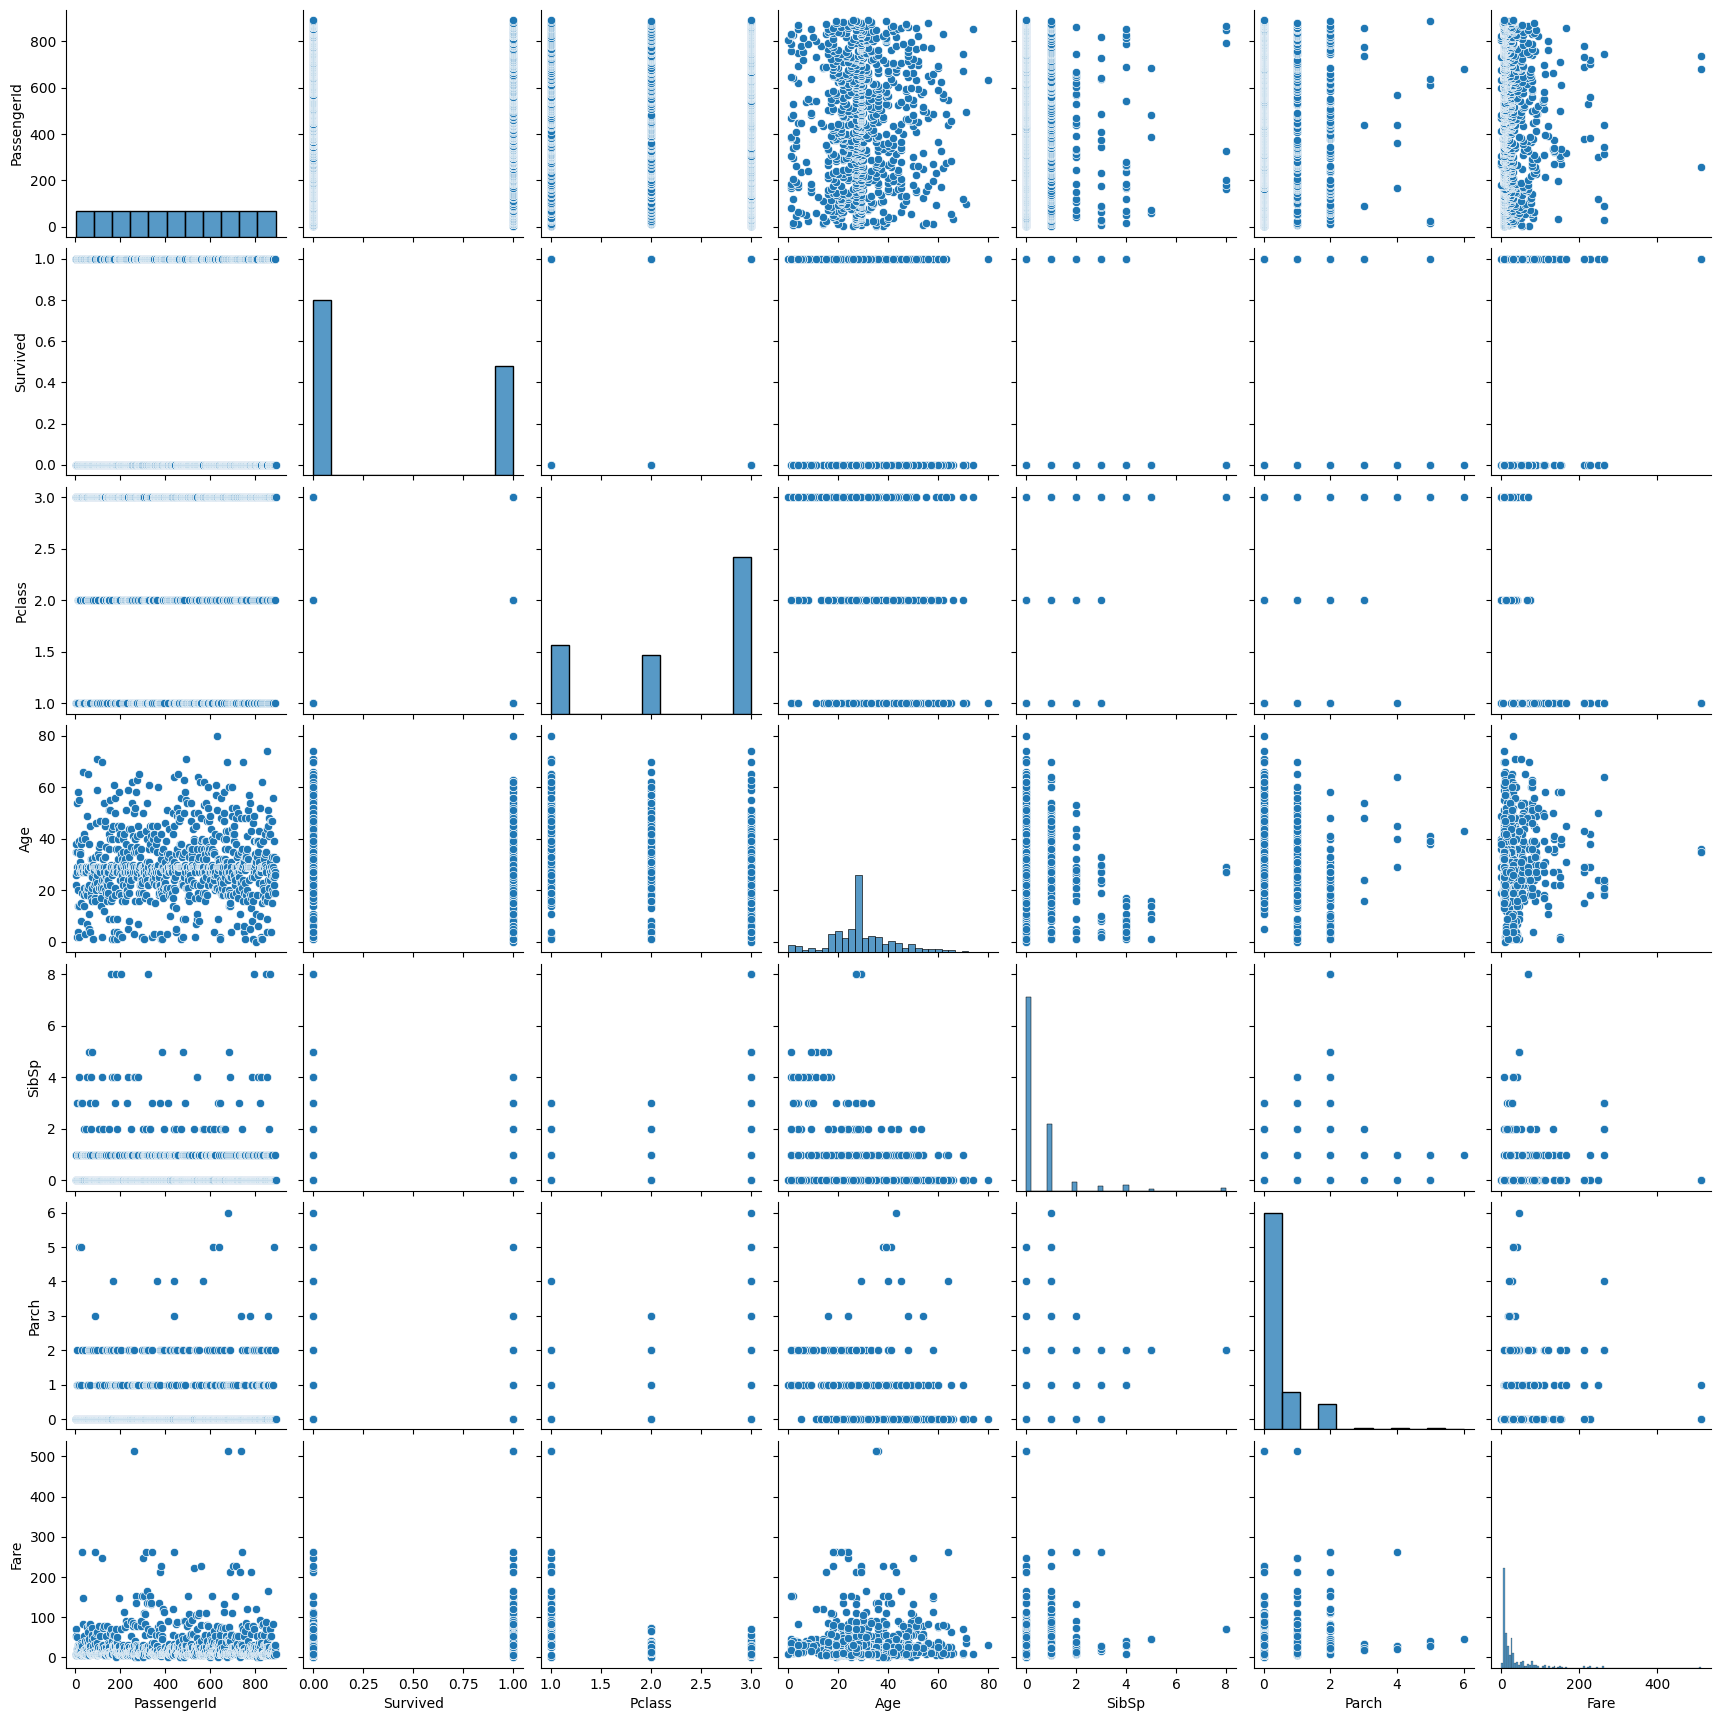

In [58]:
numerical_cols = df.select_dtypes(include=np.number).columns
sns.pairplot(df[numerical_cols])
plt.show()

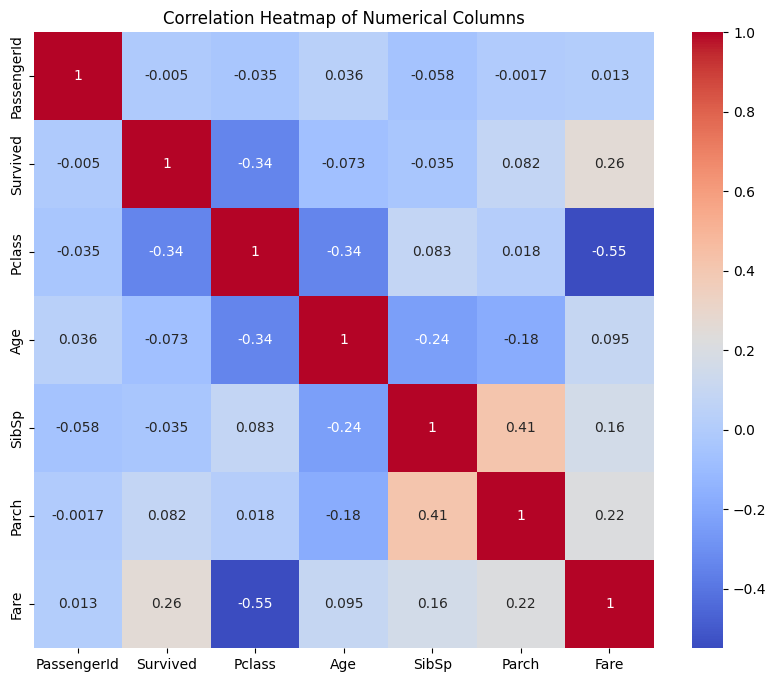

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

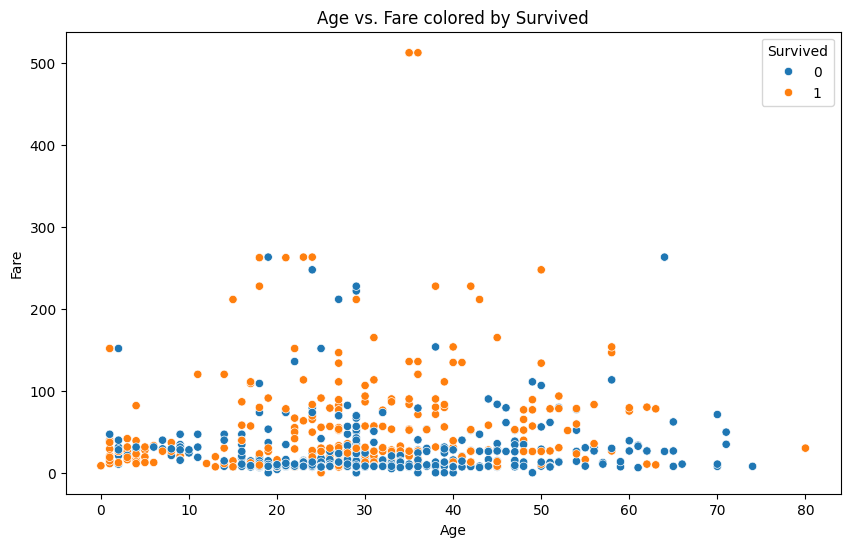

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs. Fare colored by Survived')
plt.show()

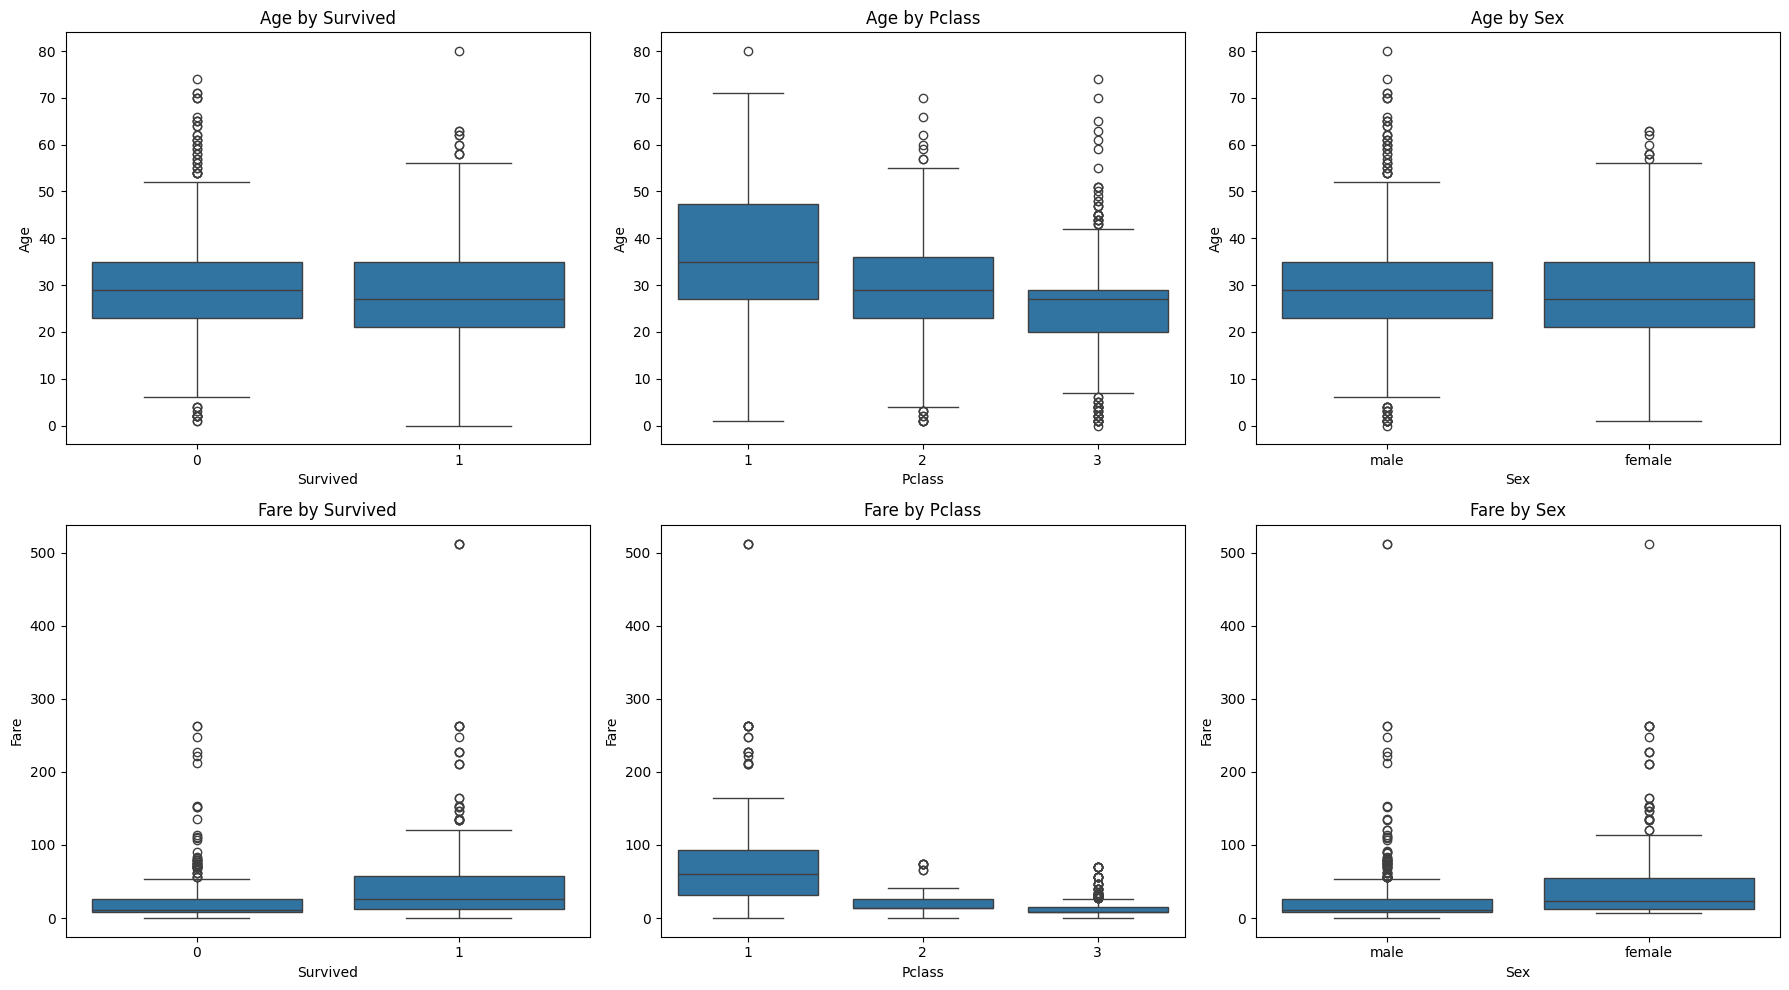

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age by Survived')
sns.boxplot(x='Pclass', y='Age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age by Pclass')
sns.boxplot(x='Sex', y='Age', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Age by Sex')

sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Fare by Survived')
sns.boxplot(x='Pclass', y='Fare', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Fare by Pclass')
sns.boxplot(x='Sex', y='Fare', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Fare by Sex')

plt.tight_layout()
plt.show()

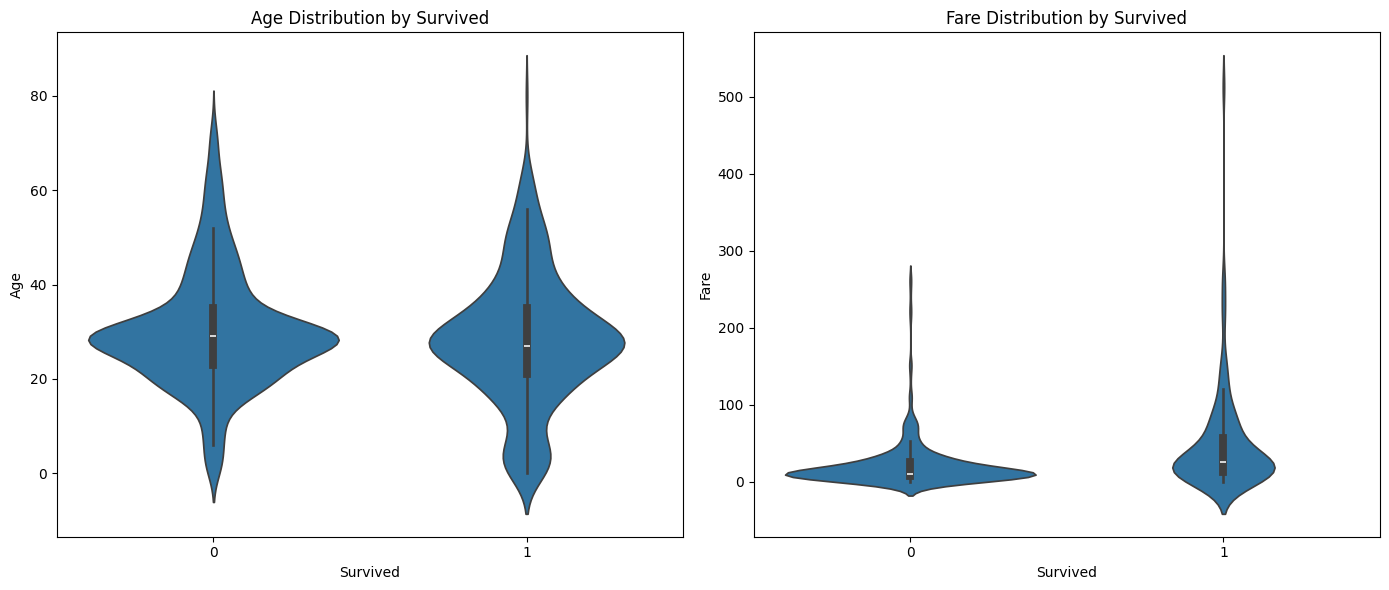

In [65]:
# Violin plots for numerical features vs. Survived
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Survived')

sns.violinplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare Distribution by Survived')

plt.tight_layout()
plt.show()

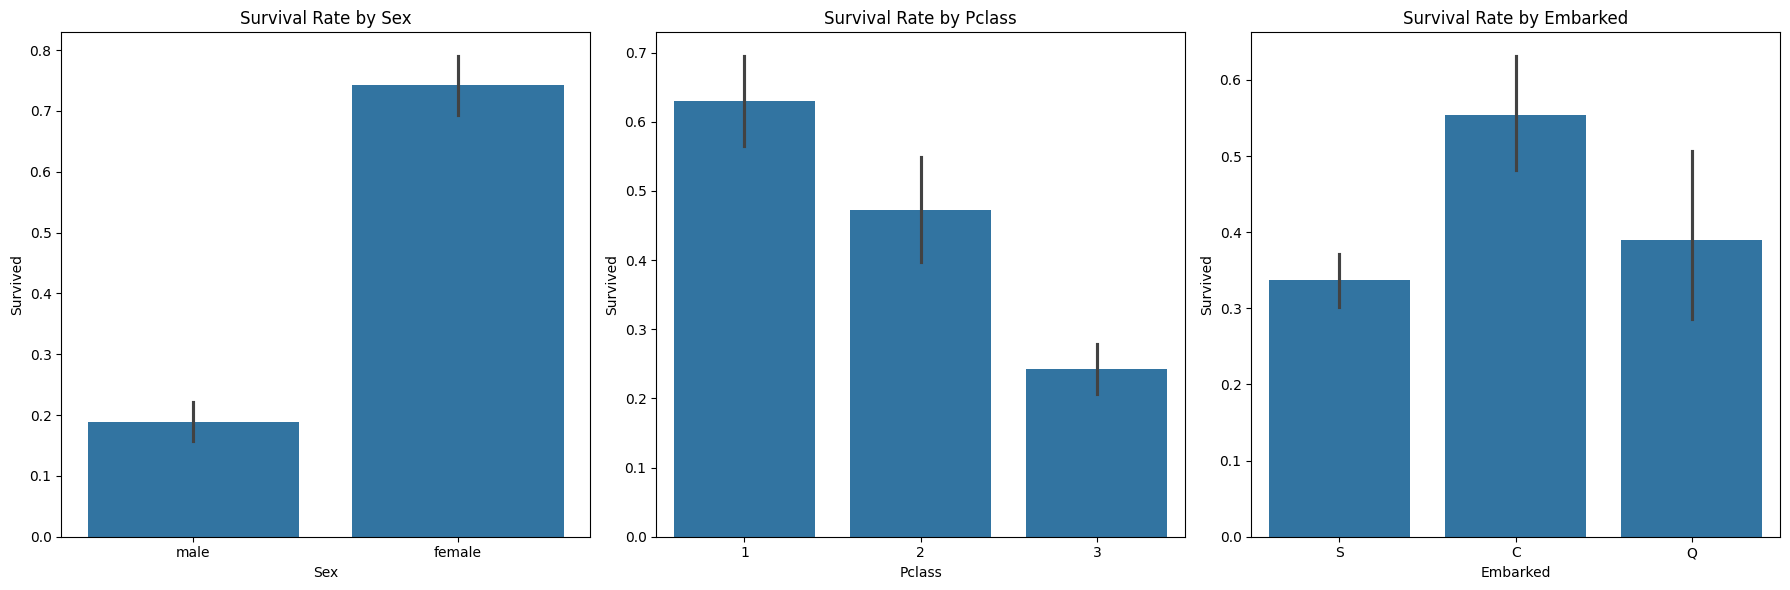

In [64]:
# Bar plots for categorical features vs. Survived
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival Rate by Sex')

sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival Rate by Pclass')

sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[2])
axes[2].set_title('Survival Rate by Embarked')

plt.tight_layout()
plt.show()

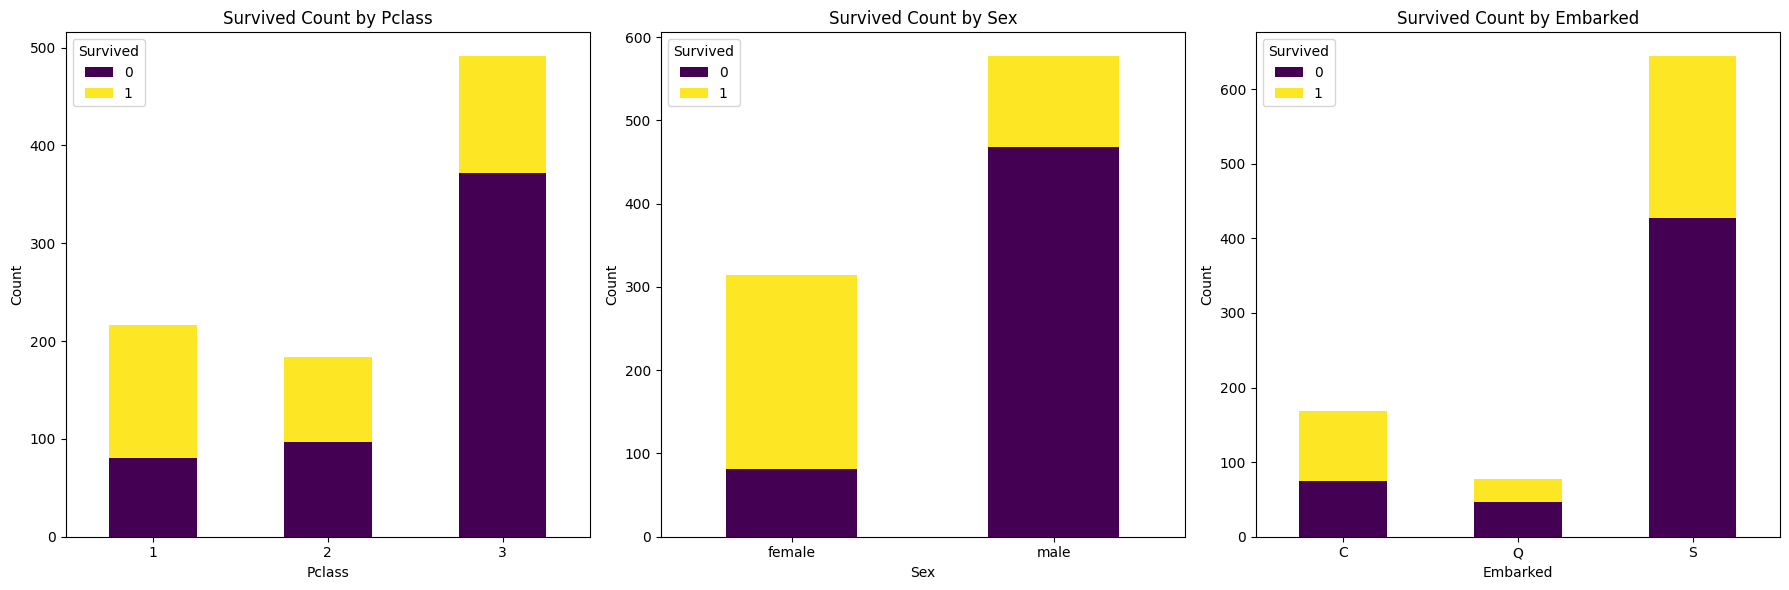

In [66]:
# Stacked bar plots for categorical features vs. Survived
# We need to create a cross-tabulation for stacked bar plots
pclass_survived = pd.crosstab(df['Pclass'], df['Survived'])
sex_survived = pd.crosstab(df['Sex'], df['Survived'])
embarked_survived = pd.crosstab(df['Embarked'], df['Survived'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

pclass_survived.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Survived Count by Pclass')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

sex_survived.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Survived Count by Sex')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)


embarked_survived.plot(kind='bar', stacked=True, ax=axes[2], colormap='viridis')
axes[2].set_title('Survived Count by Embarked')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()